# This notebook can take connvergence data and convert it into a Pmax and stdev for a gaussian distro

Pmax: 0.8440243896992644
stdev: 49.665073496615875


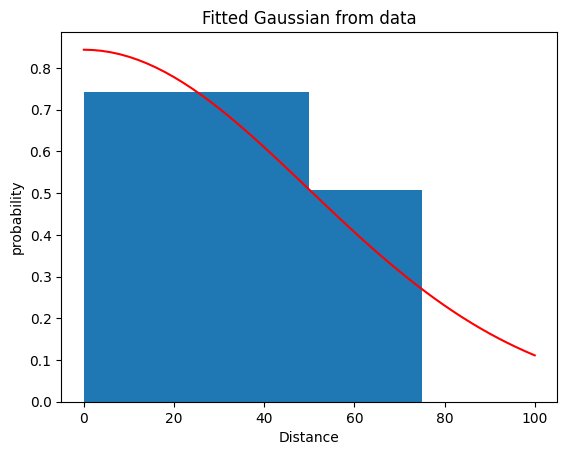

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import minimize


def gaussian(x, mean=0., stdev=1., pmax=1.):
    """Gaussian function. Default is the PDF of standard normal distribution
    Note mean parameter sets min distance a connection can be made
    """
    x = (x - mean) / stdev
    return pmax * np.exp(- x * x / 2)


def pmf(K, P):
    """probability mass function"""
    return np.array([p if k else 1 - p for k, p in zip(K, P)])


def nll(p):
    "negative log-likelihood"
    return -np.sum(np.log(p))


def fit_data(data_config):
    data = []
    for d in data_config:
        dat = np.zeros((d[2], 2))
        dat[:, 0] = d[0]
        dat[:d[1], 1] = 1.
        data.append(dat)
    data = np.vstack(data)

    def negloglikelihood(params):
        return nll(pmf(data[:, 1], gaussian(
            data[:, 0], pmax=params[0], stdev=params[1], mean=0.)))

    initParams = [.5, 50.]
    results = minimize(negloglikelihood, initParams, method='Nelder-Mead')
    params = results.x

    print("Pmax:",params[0])
    print("stdev:",params[1])

    hist = np.array([(d[0], d[1] / d[2]) for d in data_config])
    x = np.linspace(0, hist[-1, 0] + 50, 51)
    plt.bar(hist[:, 0], hist[:, 1], width=50.)
    plt.plot(x, gaussian(x, pmax=params[0], stdev=params[1]), 'r')
    plt.title("Fitted Gaussian from data")
    plt.xlabel("Distance")
    plt.ylabel("probability")
    plt.show()
    return params


#Each row corresponds to a distance bin in the reported histograms. 
#The first column are the bin centers (approx average distance for pairs 
#in that bin). The 2nd column are the number of connections in each bin, 
#and the 3rd column are the total numbers of pairs observed in each bin.
# data for PN2FSI

# data for PN2FSI,FSI2PN and PN2FSI reci from from Holmgren et al 2003 figure 3
data_config_PN2FSI = np.array(((25, 31, 39),
                               (50, 75, 118)))
                               #(100, 275, 471)))
# data PN2FSI reci
data_config_PN2FSI_RECI = np.array(((25, 20, 39),
                                    (50, 45, 118)))
                                    #(100, 120, 471)))

# data FSI2PN 
data_config_FSI2PN = np.array(((25, 29, 39),
                               (50, 60, 118)))
                               #(100, 260, 471)))

# data estimated from Fino et al 2011 figure 4
# total at
# 100
# 200
# 300
# 400

data_config_LTS2PN = np.array(((100, 41, 51),
                               (140, 134, 148),
                               (200, 286, 344),
                               (300, 451, 646)))

# find Pmax and Stdev
params = fit_data(data_config_FSI2PN)


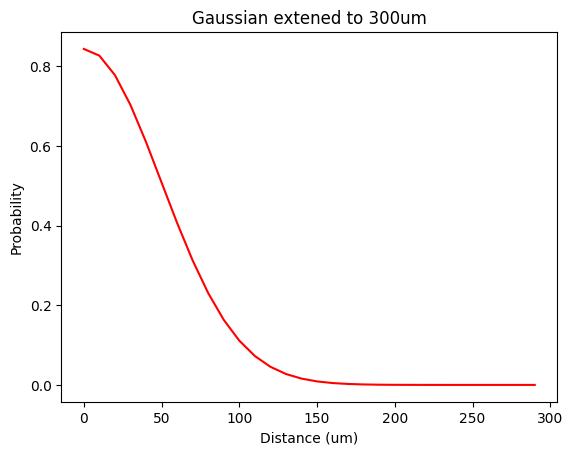

In [2]:
x = np.arange(0,300,10)
plt.plot(x, gaussian(x, pmax=params[0], stdev=params[1]), 'r')
plt.title("Gaussian extened to 300um")
plt.xlabel("Distance (um)")
plt.ylabel("Probability")
plt.show()

## not as good as the way above but should be close enough Greg wrote this so probs not as good as Ziao above but i tried :/

Pmax (max probability): 0.5639458003489634
Standard deviation: 56.62351413363471
R-squared: 0.9425867369854302


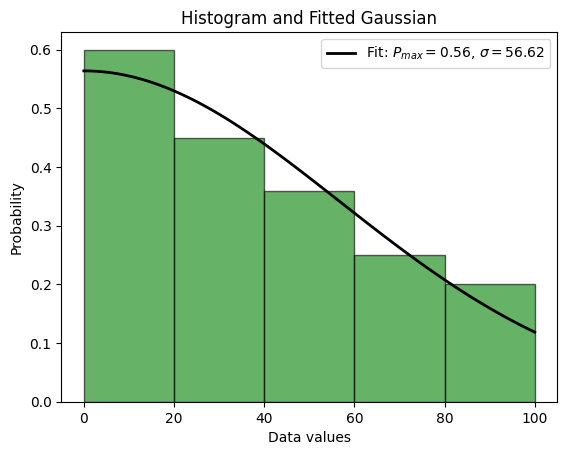

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm

# Given histogram data 
# [binStart,binEnd,ProbInBin]
hist_data = np.array([[0, 20, 0.6], [20, 40, 0.45], [40, 60, 0.36], [60, 80, 0.25],[80,100,0.2]])

# Extract start, end, and probabilities
start = hist_data[:, 0]
end = hist_data[:, 1]
frequencies = hist_data[:, 2]

# Calculate bin centers
bin_centers = (start + end) / 2

# Define a Gaussian function
def gaussian(x, sigma, A):
    return A * np.exp(-0.5 * (x / sigma) ** 2)

# Initial guess for the parameters: standard deviation, amplitude
initial_guess = [np.std(bin_centers), max(frequencies)]

# Set bounds for the fitting parameters: mu=0, sigma>0, A>0, we force mu to be 0 
bounds = ([0, 0], [np.inf, np.inf])

# Perform the curve fit with bounds
popt, pcov = curve_fit(gaussian, bin_centers, frequencies, p0=initial_guess, bounds=bounds, maxfev=2000)

# Extract the parameters
sigma, A = popt

# Calculate Pmax
Pmax = A

residuals = frequencies - gaussian(bin_centers, sigma, A)
RSS = np.sum(residuals ** 2)
TSS = np.sum((frequencies - np.mean(frequencies)) ** 2)
R_squared = 1 - (RSS / TSS)


# Print the fitted parameters and R-squared
print(f"Pmax (max probability): {Pmax}")
print(f"Standard deviation: {sigma}")
print(f"R-squared: {R_squared}")

# Plot the histogram
plt.bar(bin_centers, frequencies, width=(end - start), alpha=0.6, color='g', edgecolor='black')

# Plot the fitted Gaussian
x = np.linspace(min(start), max(end), 100)
plt.plot(x, gaussian(x, sigma, A), 'k', linewidth=2, label=f'Fit: $P_{{max}}={Pmax:.2f}$, $\sigma={sigma:.2f}$')
plt.xlabel('Data values')
plt.ylabel('Probability')
plt.title('Histogram and Fitted Gaussian')
plt.legend()

# Show the plot
plt.show()


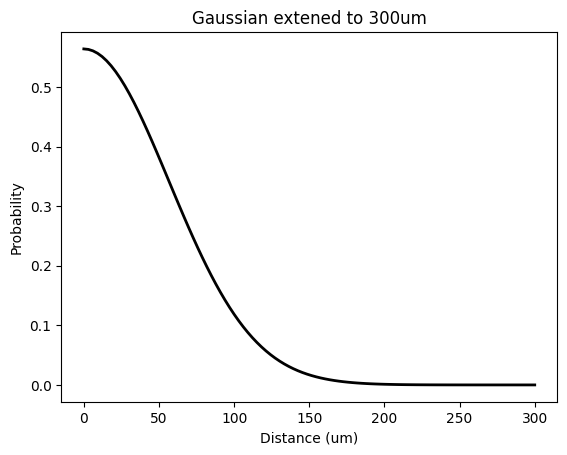

In [40]:
x = np.linspace(0, 300, 100)
plt.plot(x, gaussian(x, sigma, A), 'k', linewidth=2, label=f'Fit: $P_{{max}}={Pmax:.2f}$, $\sigma={sigma:.2f}$')
plt.title("Gaussian extened to 300um")
plt.xlabel("Distance (um)")
plt.ylabel("Probability")
plt.show()